In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
data = pd.read_csv('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/Texas_A&M_University 2016-20 Webscraped.csv')
data['Keyword'] = data['Keyword'].apply(lambda x: x[1:-1].split(', '))
clean_data = data.explode('Keyword')

In [5]:
# frequency of top 50 keywords
frequency_top50 = clean_data['Keyword'].value_counts().to_frame().head(50)
frequency_top50

,Keyword
'agri',1654
'land',1144
'food',762
' animal',734
' nutri',620
' soil',322
' fish',300
'crop',286
' horticult',228
' metaboli',190


In [6]:
# frequency of top 50 keywords in each department
by_department = clean_data[clean_data['Keyword'].isin(frequency_top50.index)].groupby(['Department Name','Keyword']).count()
frequency_in_department = by_department.loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
frequency_in_department.head()

Count
Department Name                     Keyword                    
AERO - Aerospace Engineering (AERO) ' refrigerat'             8
AFST - Africana Studies (AFST)      ' african diaspora '     24
                                    ' slavery '               8
                                    'agri'                    8
AGCJ - Ag Comm & Journalism (AGCJ)  'agri'                  176

In [7]:
# top keyword in each department
by_department_fullkeywords = clean_data.groupby(['Department Name','Keyword']).count().loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
by_department_fullkeywords_reset = by_department_fullkeywords.reset_index()
top_key_dep=by_department_fullkeywords_reset.sort_values('Count').groupby('Department Name').last()
top_key_dep

,Keyword,Count
Department Name,,
AERO - Aerospace Engineering (AERO),' refrigerat',8
AFST - Africana Studies (AFST),' african diaspora ',24
AGCJ - Ag Comm & Journalism (AGCJ),'agri',176
AGEC - Agricultural Economics (AGEC),'agri',322
AGLS - Ag & Life Sciences (AGLS),'agri',64
...,...,...
VIBS - Vet Integrative Biosci (VIBS),'food',32
VTPB - Veterinary Pathobiology (VTPB),' animal',34
VTPP - Vet Physiology & Pharm (VTPP),' animal',26


In [8]:
#distribution of top 10 
top3_department = by_department_fullkeywords_reset.groupby('Department Name').sum().sort_values('Count',ascending=False).head(3)
top3_department


,Count
Department Name,
ANSC - Animal Science (ANSC),1326
HORT - Horticultural Sciences (HORT),1096
SCSC - Soil and Crop Sciences (SCSC),800


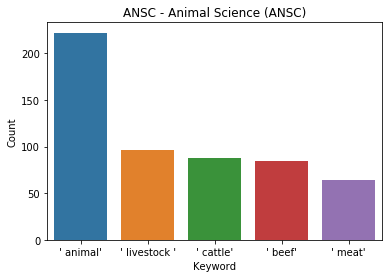

In [9]:
# ANSC
plt.figure
ANSC = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='ANSC - Animal Science (ANSC)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=ANSC)
plt.title('ANSC - Animal Science (ANSC)');

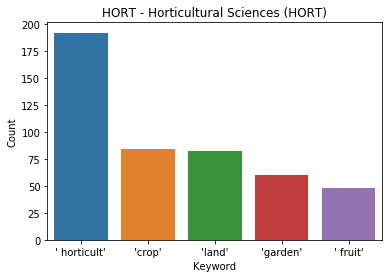

In [10]:
# HORT
plt.figure
HORT = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='HORT - Horticultural Sciences (HORT)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=HORT)
plt.title('HORT - Horticultural Sciences (HORT)');

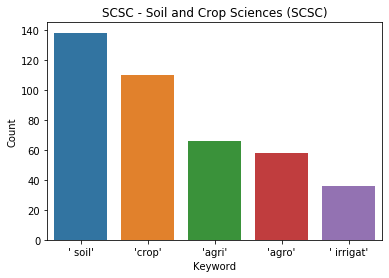

In [11]:

# SCSC
plt.figure
SCSC = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='SCSC - Soil and Crop Sciences (SCSC)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=SCSC)
plt.title('SCSC - Soil and Crop Sciences (SCSC)');


In [12]:
# export
writer = pd.ExcelWriter('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/EDA/Texas A&M University EDA result.xlsx', engine='xlsxwriter')

frequency_top50.to_excel(writer, sheet_name='top 50 keywords')
frequency_in_department.to_excel(writer, sheet_name='keywords in dep')
top_key_dep.to_excel(writer, sheet_name='top keyword in dep')

writer.save()